In [4]:
import pandas as pd

#Chargement des données
df= pd.read_csv('sales_data_challenge.csv')
df.head()

,order_id,date,product_id,category,price,quantity,customer_region
0,1,2025-01-20,P043,Electronics,5.14,5,East
1,2,2024-11-15,P048,Books,54.07,1,East
2,3,2024-12-08,P030,Home,256.96,5,North
3,4,2024-12-22,P031,Books,205.12,1,West
4,5,2024-11-18,P049,Clothing,150.13,5,West


In [7]:
# Nettoyage des données 
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")
df['date'] = pd.to_datetime(df['date'])
df.dropna(inplace=True)
df['sales'] = df['price'] * df['quantity']

In [8]:
df.head()

,order_id,date,product_id,category,price,quantity,customer_region,sales
0,1,2025-01-20,P043,Electronics,5.14,5,East,25.70
1,2,2024-11-15,P048,Books,54.07,1,East,54.07
2,3,2024-12-08,P030,Home,256.96,5,North,1284.80
3,4,2024-12-22,P031,Books,205.12,1,West,205.12
4,5,2024-11-18,P049,Clothing,150.13,5,West,750.65


<Axes: title={'center': 'Ventes totales par categories'}, ylabel='category'>

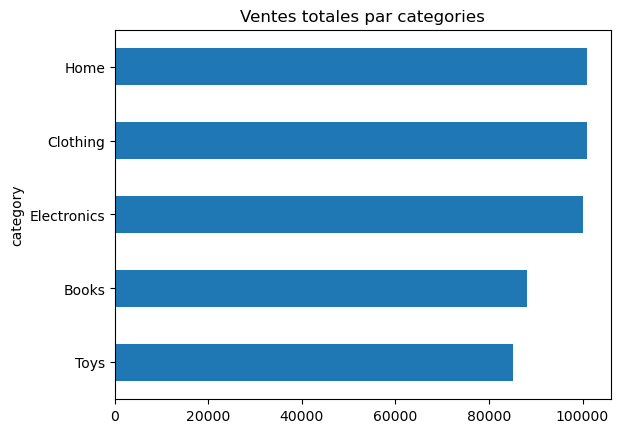

In [10]:
# Exploration des patterns par categorie 
df.groupby('category')['sales'].sum().sort_values().plot(kind='barh', title= "Ventes totales par categories")

<Axes: title={'center': 'Ventes par region'}, ylabel='customer_region'>

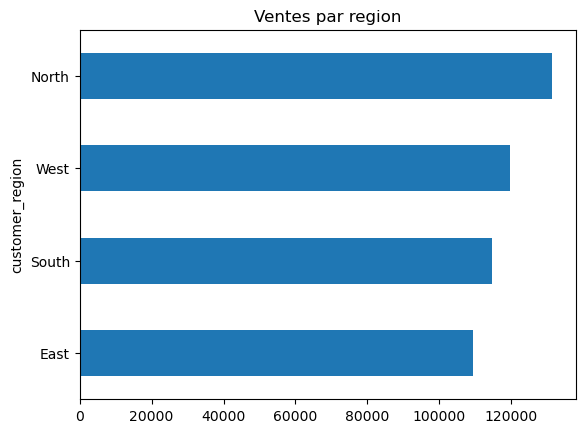

In [11]:
# Exploration par region 
df.groupby('customer_region')['sales'].sum().sort_values().plot(kind='barh', title= "Ventes par region")

C:\Users\ghofr\AppData\Local\Temp\ipykernel_16324\1269282102.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M')['sales'].sum().plot(title="Evolution des ventes par mois")


<Axes: title={'center': 'Evolution des ventes par mois'}, xlabel='date'>

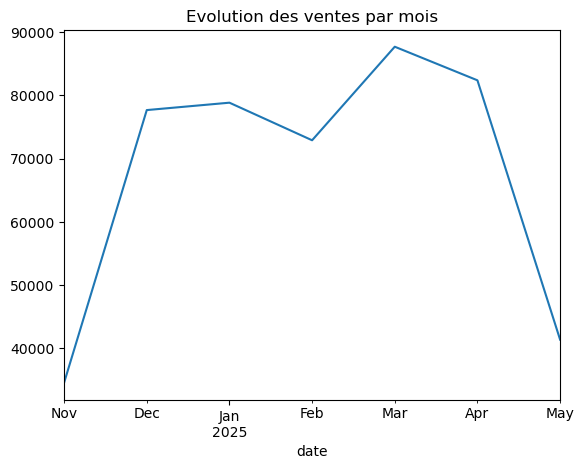

In [12]:
# Exploration par mois 
df.set_index('date').resample('M')['sales'].sum().plot(title="Evolution des ventes par mois")

### Conclusion 
1- Les produits **Clothing**, **Home** et **Electronics** ont les ventes les plus elevees -> prioriser le stock.

2- La region **North** surperfomre -> investir plus en marketing.

3- Les ventes sont faibles en **Novembre** et **Mai** -> Il faut faire des promotions ciblées à cette periode .

NameError: name 'plt' is not defined

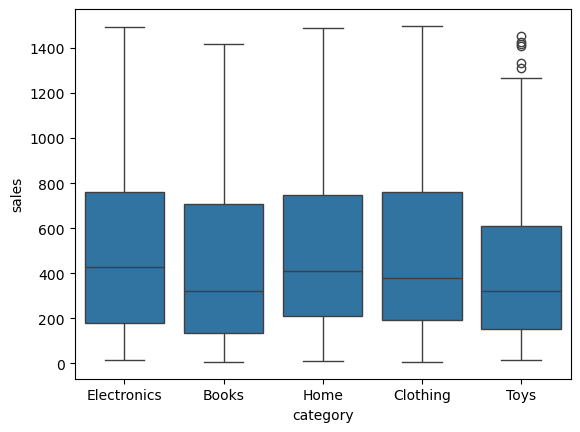

In [13]:
import seaborn as sns
sns.boxplot(x='category', y='sales', data=df)
plt.title("Repartition des ventes par categorie")